In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import make_classification

## Step 1 : Create the dataset using make_classification¶

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2, n_redundant=0)

In [4]:
pd.DataFrame(X)[0]

0      2.809873
1     -0.964452
2      0.445888
3      0.091131
4      0.140380
         ...   
995    1.517049
996   -1.149886
997    1.419854
998   -0.321890
999    1.693568
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

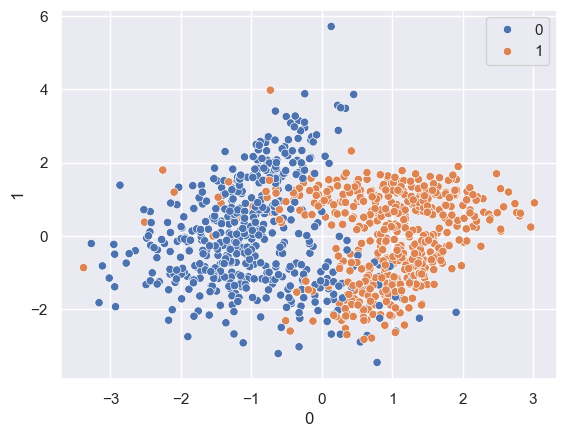

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1], hue=y)

## Step 2 : Divide into Training and Testin

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

## Step 3 : Model Training

In [7]:
from sklearn.svm import SVC
svc = SVC(kernel='linear') #Kernel options: Linear, Poly, Rbf and Sigmoid. Use whatever suits your data

In [8]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

## Step 4 : Performance Metrics

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(score)
print(cm)
print(classification_report(y_test, y_pred))

0.8933333333333333
[[129  16]
 [ 16 139]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       145
           1       0.90      0.90      0.90       155

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Step 5 : Hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1,1,10,100,1000],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf', 'poly','sigmoid']}

In [12]:
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=3)

In [13]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.864 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.907 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.879 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.864 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.900 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.850 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.871 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END .....C=1, gamma

[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.886 total time=   0.3s
[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.857 total time=   0.2s
[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.929 total time=   0.8s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.900 total time=   0.3s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.864 total time=   0.3s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.771 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.707 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.686 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.657 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=100, ga

[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.936 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.886 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.507 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.900 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.850 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.914 total time=   0.0s
[CV 4/5] END C=1000, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.917142857142857


In [15]:
y_pred_grid = grid.predict(X_test)

In [16]:
grid_score = accuracy_score(y_test, y_pred_grid)
grid_cm = confusion_matrix(y_test, y_pred_grid)

print(grid_score)
print(grid_cm)
print(classification_report(y_test, y_pred_grid))

0.92
[[132  13]
 [ 11 144]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       145
           1       0.92      0.93      0.92       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

